In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

 

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=887bd8bbc0505bb1835a25887668c85d05cf6b889a15cf695cfe08dbc193dea6
  Stored in directory: /root/.cache/pip/wheels/f2/b5/2c/59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
path = 'https://raw.githubusercontent.com/hqr999/Projeto-Dirigido/main/Ouro_Novo.xlsx%20-%20Planilha2(1).csv'
df =pd.read_csv(path)

In [ ]:
df

,Data,Abertura,Máxima,Mínima,Fechamento
0,3/1/2017,124.200,124.20,124.200,124.200
1,3/2/2017,123.500,123.50,121.500,123.500
2,3/3/2017,123.799,123.80,123.000,123.700
3,3/6/2017,122.999,123.00,121.500,121.700
4,3/7/2017,121.650,121.65,120.800,120.800
...,...,...,...,...,...
1226,2/22/2022,308.000,309.50,305.000,305.000
1227,2/23/2022,303.010,305.25,303.000,305.250
1228,2/24/2022,319.000,323.00,312.000,317.500
1229,2/25/2022,317.500,317.50,307.012,307.012


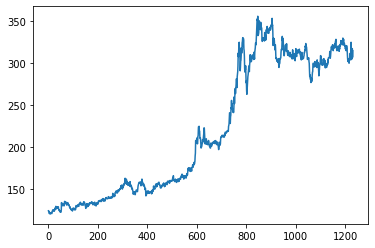

In [ ]:
plt.plot(df['Fechamento'])


In [ ]:
##CRIANDO AS MÉDIAS MÓVEIS
df['MM_7D'] = df['Fechamento'].rolling(7).mean()
df['MM_30D'] = df['Fechamento'].rolling(30).mean()
df.head()


,Data,Abertura,Máxima,Mínima,Fechamento,MM_7D,MM_30D
0,3/1/2017,124.200,124.20,124.2,124.2,NaN,NaN
1,3/2/2017,123.500,123.50,121.5,123.5,NaN,NaN
2,3/3/2017,123.799,123.80,123.0,123.7,NaN,NaN
3,3/6/2017,122.999,123.00,121.5,121.7,NaN,NaN
4,3/7/2017,121.650,121.65,120.8,120.8,NaN,NaN


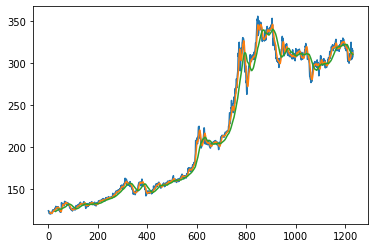

In [ ]:
#PLOT COM AS MÉDIAS MÓVEIS
plt.plot(figsize=(12,8))
plt.plot(df['Fechamento'])
plt.plot(df['MM_7D'])
plt.plot(df['MM_30D'])


In [ ]:
#Jogando os dados do fechamento do dia seguinte no dia anterior ( Para prever o fechamento do dia seguinte utilizando as features do dia anterior )
df['Fechamento'] = df['Fechamento'].shift(-1)
df

,Data,Abertura,Máxima,Mínima,Fechamento,MM_7D,MM_30D
0,3/1/2017,124.200,124.20,124.200,123.500,NaN,NaN
1,3/2/2017,123.500,123.50,121.500,123.700,NaN,NaN
2,3/3/2017,123.799,123.80,123.000,121.700,NaN,NaN
3,3/6/2017,122.999,123.00,121.500,120.800,NaN,NaN
4,3/7/2017,121.650,121.65,120.800,122.400,NaN,NaN
...,...,...,...,...,...,...,...
1226,2/22/2022,308.000,309.50,305.000,305.250,311.571429,311.596400
1227,2/23/2022,303.010,305.25,303.000,317.500,310.607143,311.054733
1228,2/24/2022,319.000,323.00,312.000,307.012,311.964286,310.964733
1229,2/25/2022,317.500,317.50,307.012,315.010,312.394571,310.498467


In [ ]:
#Retirando os dados nulos
df.dropna(inplace=True)
df

,Data,Abertura,Máxima,Mínima,Fechamento,MM_7D,MM_30D
29,4/11/2017,127.48,127.80,126.000,129.500,125.735714,123.448667
30,4/12/2017,128.60,129.50,127.500,129.000,126.535714,123.625333
31,4/13/2017,128.49,129.00,128.490,126.550,127.178571,123.808667
32,4/17/2017,128.00,128.40,126.500,128.600,127.500000,123.903667
33,4/18/2017,127.00,128.60,127.000,128.000,127.807143,124.133667
...,...,...,...,...,...,...,...
1225,2/21/2022,307.00,318.00,302.790,305.000,312.500000,312.223067
1226,2/22/2022,308.00,309.50,305.000,305.250,311.571429,311.596400
1227,2/23/2022,303.01,305.25,303.000,317.500,310.607143,311.054733
1228,2/24/2022,319.00,323.00,312.000,307.012,311.964286,310.964733


In [ ]:
#Final da tabela
df.tail()

,Data,Abertura,Máxima,Mínima,Fechamento,MM_7D,MM_30D
1225,2/21/2022,307.00,318.00,302.790,305.000,312.500000,312.223067
1226,2/22/2022,308.00,309.50,305.000,305.250,311.571429,311.596400
1227,2/23/2022,303.01,305.25,303.000,317.500,310.607143,311.054733
1228,2/24/2022,319.00,323.00,312.000,307.012,311.964286,310.964733
1229,2/25/2022,317.50,317.50,307.012,315.010,312.394571,310.498467


In [ ]:
#Separando a base de dados (SPLIT)
qnt_linhas = len(df)
linhas_treino = round(.50*qnt_linhas) #(50$ da minha base em treino)
linhas_teste  = round(.30*qnt_linhas)
linhas_validacao = qnt_linhas-1

info = (
    f' numero de linhas treino = 0:{linhas_treino}'
    f'numero de linhas teste = {linhas_treino}:{linhas_treino+linhas_teste -1}'
    f'numero de linha validacao ={linhas_teste+linhas_treino -1}:{linhas_validacao}'
)
info

' numero de linhas treino = 0:600numero de linhas teste = 600:959numero de linha validacao =959:1200'

In [ ]:
#Resetando o index
df = df.reset_index(drop=True)
df_completo = df
df

,Data,Abertura,Máxima,Mínima,Fechamento,MM_7D,MM_30D
0,4/11/2017,127.48,127.80,126.000,129.500,125.735714,123.448667
1,4/12/2017,128.60,129.50,127.500,129.000,126.535714,123.625333
2,4/13/2017,128.49,129.00,128.490,126.550,127.178571,123.808667
3,4/17/2017,128.00,128.40,126.500,128.600,127.500000,123.903667
4,4/18/2017,127.00,128.60,127.000,128.000,127.807143,124.133667
...,...,...,...,...,...,...,...
1196,2/21/2022,307.00,318.00,302.790,305.000,312.500000,312.223067
1197,2/22/2022,308.00,309.50,305.000,305.250,311.571429,311.596400
1198,2/23/2022,303.01,305.25,303.000,317.500,310.607143,311.054733
1199,2/24/2022,319.00,323.00,312.000,307.012,311.964286,310.964733


In [ ]:
#Separando as features e labels
features = df.drop(['Data','Fechamento'],1)
labels = df['Fechamento']

In [ ]:
#Agora vamos escolher as melhores variaveis para da nossa base de dados com Kbest
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [ ]:
#Apresentar todas as features para rodar as melhores no modelo unsado o modo kbest
features_list = ('Abertura','Máxima','Mínima','MM_7D','MM_30D')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)


Melhores features:
{'MM_7D': 963.7141581007471, 'Mínima': 769.3804272547649, 'Máxima': 636.8470680900513, 'MM_30D': 446.36525066324685}


In [ ]:
#Separando as melhores features para utilizar
features = df.drop(['Data','Fechamento','MM_30D'],1)


In [ ]:
#Separa os dados de treino teste e validação
X_train = features[:linhas_treino]
X_test = features[linhas_treino:linhas_treino + linhas_teste -1]

y_train = labels[:linhas_treino]
y_test = labels[linhas_treino:linhas_treino +linhas_teste -1]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

600 600
359 359


In [ ]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)  # Normalizando os dados de entrada(treinamento)
X_test_scale  = scaler.transform(X_test)       # Normalizando os dados de entrada(teste)
print(X_test_scale)
print(X_train_scale)

[[0.89473684 0.99031008 0.94924526 0.91828336]
 [0.98086124 1.02906977 1.00069902 0.93812463]
 [0.93588517 0.95155039 0.95684328 0.95414462]
 ...
 [1.784689   1.79457364 1.86050046 1.89756026]
 [1.78469856 1.82364341 1.87822916 1.89902998]
 [1.85166507 1.91085271 1.95927464 1.91122869]]
[[0.05722488 0.04844961 0.04761422 0.0260876 ]
 [0.06794258 0.06492248 0.06281025 0.03431805]
 [0.06688995 0.06007752 0.07283963 0.0409318 ]
 ...
 [0.82870813 0.85465116 0.87825955 0.85492357]
 [0.87368421 0.88372093 0.92391855 0.87256026]
 [0.88038278 0.92248062 0.93404924 0.8909465 ]]


In [ ]:
#CD -> QUAL PRÓXIMO OS DADOS ESTÃO DA LINHA DE LR
#treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_train_scale, y_train)
pred= lr.predict(X_test_scale)
cd =r2_score(y_test, pred)
coef = lr.coef_

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:98.98'

In [ ]:
#Treinamento usando rede neural
rn = MLPRegressor(max_iter=2000)

rn.fit(X_train_scale, y_train)
pred= rn.predict(X_test_scale)

cd = rn.score(X_test_scale, y_test)


f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:98.63'

In [ ]:
#rede neural com ajuste hyper parameters

#rn = MLPRegressor()

#parameter_space = {
#        'hidden_layer_sizes': [(i,) for i in list(range(1, 21))],
#        'activation': ['tanh', 'relu'],
#        'solver': ['sgd', 'adam', 'lbfgs'], 
#        'alpha': [0.0001, 0.05],
#        'learning_rate': ['constant', 'adaptive'],
#    }

#search = GridSearchCV(rn, parameter_space, n_jobs=-1, cv=5)


#search.fit(X_train_scale,y_train)
#clf = search.best_estimator_
#pred= search.predict(X_test_scale)

#cd = search.score(X_test_scale, y_test)

#f'Coeficiente de determinação:{cd * 100:.2f}'

In [ ]:
valor_novo = features.tail(241)
valor_novo.head()

,Abertura,Máxima,Mínima,MM_7D
960,307.900,309.000,305.310,309.028571
961,304.000,305.502,302.750,308.742857
962,310.000,312.000,309.001,309.171429
963,309.010,310.000,308.000,309.871429
964,311.001,311.499,310.000,310.085429


In [ ]:
#executando a previsão
previsao=scaler.transform(valor_novo)
pred=lr.predict(previsao)

pred

array([308.37021596, 305.78397367, 312.2947151 , 310.49457458,
       312.06378141, 307.88712043, 305.46730218, 306.71036986,
       305.26348311, 309.60604007, 312.97900855, 317.5401797 ,
       315.46828937, 311.61688167, 309.66074624, 316.34749817,
       312.9044819 , 313.23289782, 315.20366159, 312.84239019,
       316.77270104, 313.98526212, 318.00131112, 315.04641529,
       316.2279134 , 318.24680112, 314.50724783, 313.95383711,
       312.84878472, 313.07938983, 310.81725757, 309.49018578,
       306.92602405, 305.49857428, 306.50557384, 313.42268426,
       309.33656062, 306.10687803, 306.62234378, 306.61134196,
       306.68545758, 307.54138349, 308.73302966, 310.46241407,
       310.03864515, 313.00293457, 314.18488962, 319.22069546,
       317.49517272, 318.85854937, 319.95252871, 323.75084008,
       322.21070041, 320.4548359 , 320.36685677, 317.86233093,
       314.3243178 , 311.3385752 , 306.75865532, 306.87780021,
       305.99451228, 307.23530049, 307.79328296, 307.05

In [ ]:
data_pregao_full=df_completo['Data']
data_pregao=data_pregao_full.tail(241)

res_full=df_completo['Fechamento']
res=res_full.tail(241)

df=pd.DataFrame({'Data':data_pregao, 'real':res, 'previsao':pred})


df.set_index('Data', inplace=True)

df.head()

,real,previsao
Data,,
3/11/2021,305.500,308.370216
3/12/2021,310.000,305.783974
3/15/2021,310.000,312.294715
3/16/2021,311.498,310.494575
3/17/2021,306.000,312.063781


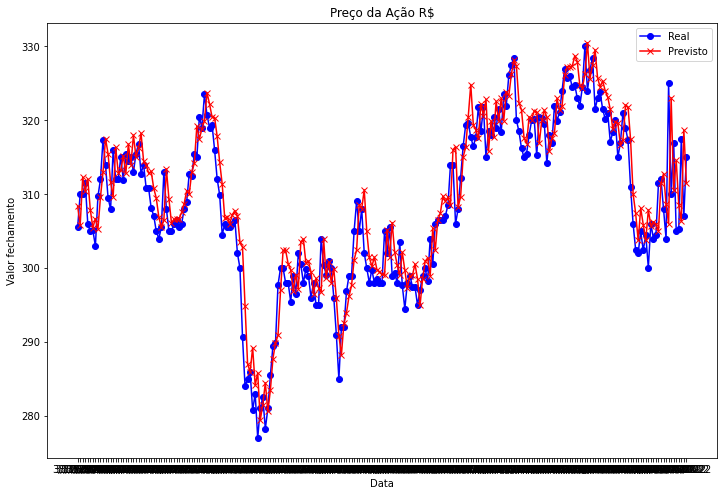

In [ ]:
#plotagem
plt.figure(figsize=(12,8))
plt.title("Preço da Ação R$")
plt.plot(df["real"],label = "Real", color = "blue", marker = 'o')
plt.plot(df["previsao"],label = "Previsto", color = "red",marker='x')
plt.xlabel("Data")
plt.ylabel("Valor fechamento")
plt.legend()

In [ ]:
for index, row in df.iterrows():
    df.loc[index,'diferenca'] = (df.loc[index,'real'] - df.loc[index,'previsao']);

In [ ]:

df['diferenca'].describe()

count    241.000000
mean      -1.341269
std        4.004459
min      -13.055250
25%       -3.717258
50%       -1.462414
75%        1.003425
max       18.987423
Name: diferenca, dtype: float64

In [ ]:
#CORRELAÇÃO DOS ATIVOS COM O OURO
tickers = ['^BVSP','USDBRL=X','BZ=F']
carteira = yf.download(tickers,start='2017-04-11',end='2022-03-02')['Close']
ouro = df_completo['Fechamento']
carteira = carteira.dropna()
carteira

[*********************100%***********************]  3 of 3 completed


,BZ=F,USDBRL=X,^BVSP
Date,,,
2017-04-11,56.230000,3.1318,64360.0
2017-04-12,55.860001,3.1368,63892.0
2017-04-13,55.889999,3.1235,62826.0
2017-04-17,55.360001,3.1437,64335.0
2017-04-18,54.889999,3.1303,64159.0
...,...,...,...
2022-02-18,93.540001,5.1706,112768.0
2022-02-22,96.839996,5.1027,112892.0
2022-02-23,96.839996,5.0571,112008.0


In [ ]:
carteira.columns = ['BRENT','DÓLAR','IBOV']
carteira

,BRENT,DÓLAR,IBOV
Date,,,
2017-04-11,56.230000,3.1318,64360.0
2017-04-12,55.860001,3.1368,63892.0
2017-04-13,55.889999,3.1235,62826.0
2017-04-17,55.360001,3.1437,64335.0
2017-04-18,54.889999,3.1303,64159.0
...,...,...,...
2022-02-18,93.540001,5.1706,112768.0
2022-02-22,96.839996,5.1027,112892.0
2022-02-23,96.839996,5.0571,112008.0


In [ ]:
#PARA ARQUIVO EXCEL
#nome_arquivo = 'Dólar x Ibov x Brent 2.xlsx'
#carteira.to_excel(nome_arquivo)

In [ ]:
#P/ ARQUIVO EXCEL
#arquivo_2 = 'Ouro_Ajustado.xlsx'
#df_completo.to_excel(arquivo_2)

In [ ]:
df_ajustado = pd.read_excel(r'C:\Users\Usuário\OneDrive\Documentos\UFABC\Projeto Dirigido\Dólar x Ibov.xls')
df_ajustado

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Usuário\\OneDrive\\Documentos\\UFABC\\Projeto Dirigido\\Dólar x Ibov.xls'

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

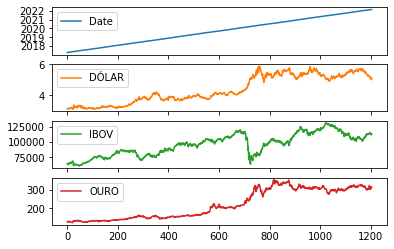

In [ ]:
df_ajustado.plot(subplots=True)

<AxesSubplot:>

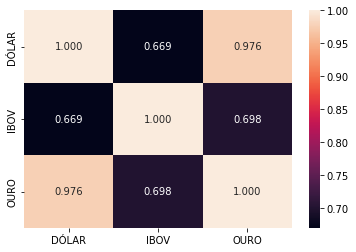

In [ ]:
sns.heatmap(df_ajustado.corr(),annot=True,fmt='.3f')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=416be4a5-1e2e-4be1-bf29-bebc5e018d70' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>